In [ ]:
##EJEN ALI PREDICTION

In [86]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import os
import seaborn as sns
from matplotlib import pyplot as plt,cm
from warnings import filterwarnings as fw
fw('ignore')
%matplotlib inline
print(os.listdir("data/"))


['tvnsalesrevenue.csv', 'Copy of Mastertable ProjectAli - Forecast_model_without_TGV_sessions.csv', '.ipynb_checkpoints', 'Copy of Mastertable ProjectAli - Forecast_model.csv', 'Copy of Mastertable ProjectAli - Forecast_model (1).csv', 'Copy of Mastertable ProjectAli - Forecast_model (2).csv', 'Copy of Mastertable ProjectAli - sales_data_daily_weekly (1).csv', 'Copy of Mastertable ProjectAli - sales_data_daily_weekly (2).csv', 'Copy of Mastertable ProjectAli - for_prediction2.csv']


In [87]:
train = pd.read_csv('data/Copy of Mastertable ProjectAli - for_prediction2.csv')
train.head()

,Date,Day,day_num,Day_gross
0,11/28/2019,Thursday,1,1856190.90
1,11/29/2019,Friday,2,1703267.99
2,11/30/2019,Saturday,3,2779696.61
3,12/1/2019,Sunday,4,2476596.36
4,12/2/2019,Monday,5,1352099.98


In [88]:
train.corr()

,day_num,Day_gross
day_num,1.00000,-0.79895
Day_gross,-0.79895,1.00000


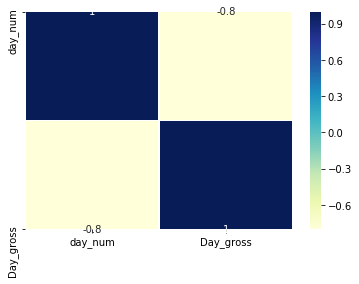

In [89]:
sns.heatmap(train.corr(), cmap='YlGnBu', annot=True, linewidths = 0.2);

In [90]:
def parser(x):
    return datetime.strptime(x, '%m/%d/%Y')

Day_gross = pd.read_csv('data/Copy of Mastertable ProjectAli - for_prediction2.csv', index_col=0, parse_dates=[0], date_parser=parser)





In [91]:
Day_gross.head()

,Day,day_num,Day_gross
Date,,,
2019-11-28,Thursday,1,1856190.90
2019-11-29,Friday,2,1703267.99
2019-11-30,Saturday,3,2779696.61
2019-12-01,Sunday,4,2476596.36
2019-12-02,Monday,5,1352099.98


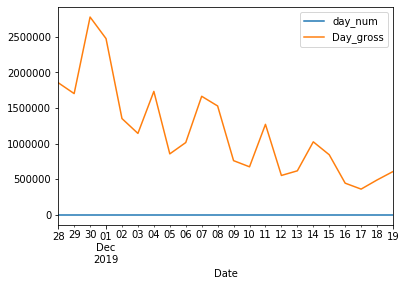

In [92]:
Day_gross.plot()

In [93]:
Day_gross.shape

(22, 3)

In [94]:
#Converting series to stationary

In [95]:
date=pd.DataFrame(train['Date'])
gross=pd.DataFrame(train['Day_gross'])
days=pd.DataFrame(train['day_num'])


In [96]:
gross

,Day_gross
0,1856190.90
1,1703267.99
2,2779696.61
3,2476596.36
4,1352099.98
5,1143327.89
6,1734003.20
7,855593.83
8,1014784.62
9,1665380.37


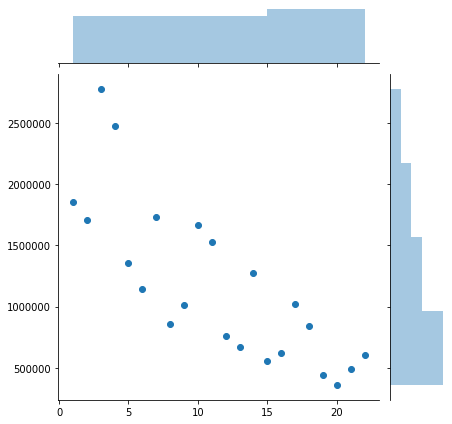

In [97]:
sns.jointplot(days, gross);

In [98]:
gross_diff = gross.diff(periods=1)

In [99]:
gross_diff = gross_diff[1:]
gross_diff.head()

,Day_gross
1,-152922.91
2,1076428.62
3,-303100.25
4,-1124496.38
5,-208772.09


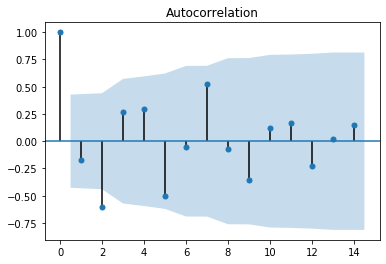

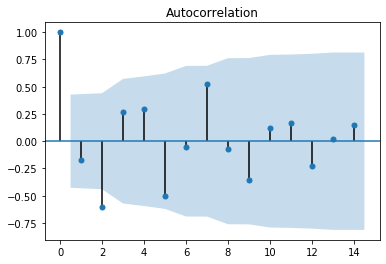

In [100]:
plot_acf(gross_diff)

In [101]:
##Putting into ARIMA Model

In [102]:
X = gross.values
train = X[0:22]
# test = X[13:]
predictions = []
train

array([[1856190.9 ],
       [1703267.99],
       [2779696.61],
       [2476596.36],
       [1352099.98],
       [1143327.89],
       [1734003.2 ],
       [ 855593.83],
       [1014784.62],
       [1665380.37],
       [1529197.28],
       [ 760264.49],
       [ 673732.21],
       [1270762.64],
       [ 552015.87],
       [ 617278.57],
       [1024782.53],
       [ 843360.55],
       [ 443591.6 ],
       [ 360183.14],
       [ 488636.81],
       [ 607089.77]])

In [103]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [139]:
model_arima = ARIMA(train,(4,2,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

587.5744753178409


In [140]:
predictions = model_arima_fit.forecast(steps=7)[0]
predictions

# mean_squared_error(test,predictions)

array([384084.63001747, 296836.95403573, 447050.78260642, 447283.98498689,
       307124.81472625, 331350.48216586, 438647.92117399])

In [141]:
sum(predictions)

2652379.569712612

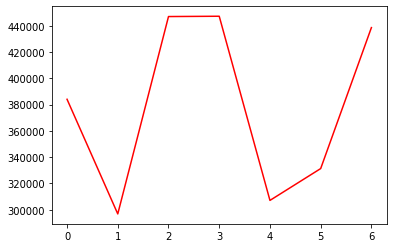

In [142]:
# plt.plot(test)
plt.plot(predictions, color='red')

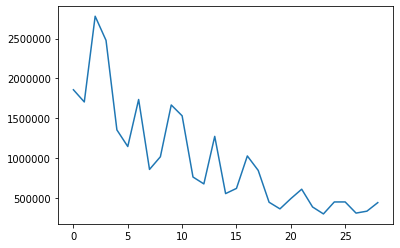

In [143]:
import numpy

final = numpy.concatenate([train,predictions[:,None]]) 
plt.plot(final)